**Junnan Shimizu**

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 3a: Linear Regression

## Task 1. Mystery Data 1

### 1a) Import the data

1. Import data 'data/mystery_data_1.csv' (using your data class or [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html))
2. Print first 10 lines rows of data.

#### 1b) Using the following links and MatPlotLib documentation to view the data:
- [MatPlotLib](https://matplotlib.org/)
- [MatPlotLib hist](https://matplotlib.org/gallery/statistics/hist.html)
1. Create a figure with 3 subplots
    1. One scatterplot with column X on the x-axis and column Y on the y-axis.
    1. Two historgrams one for the X data and the other for the Y data.
    2. Create the histograms with 10 bins.
    3. Include a title for each subplot.

/var/folders/b_/0p9b6l2s6x13bk377kvjypbm0000gn/T/ipykernel_4934/1665276705.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
/var/folders/b_/0p9b6l2s6x13bk377kvjypbm0000gn/T/ipykernel_4934/1665276705.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


First 10 Rows:
 [[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]

-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------



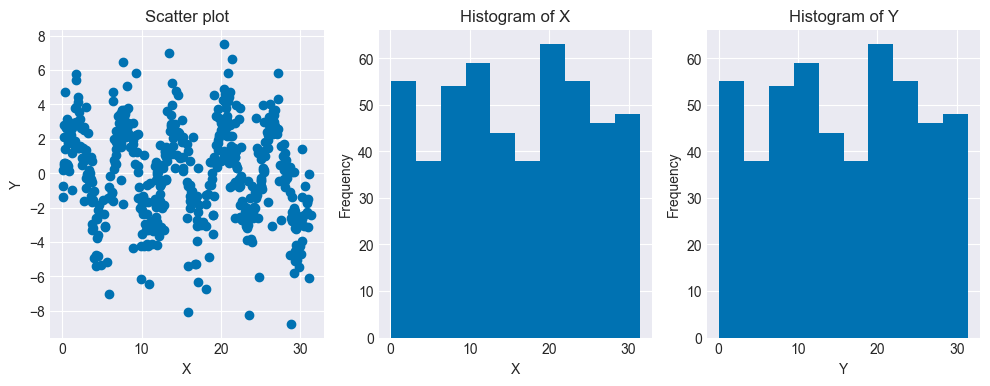

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams["figure.figsize"] = [12,4.5]

data = np.genfromtxt('data/mystery_data_1.csv', delimiter=',')
data = data[2:]

plots, axs = plt.subplots(1, 3, figsize=(12, 4))

x = data[:, 0]
y = data[:, 1]

axs[0].scatter(x, y)
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title('Scatter plot')

axs[1].hist(x, bins=10)
axs[1].set_xlabel('X')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of X')

axs[2].hist(x, bins=10)
axs[2].set_xlabel('Y')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Histogram of Y')

print('First 10 Rows:\n', data[:10])

print('''
-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------
''')

## Task 2. Analyze Mystery Data 1

### 2a) Use scipy to calculate the linear regression for Mystery Data 1 

1. Print first 10 lines rows of data.
2. Calculate the linear regression [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)
    1. The x column is the left hand side array and the y column is the right hand side array.
    2. This includes adding homogeneous coordinates (for the intercept) to the A matrix. 
    3. Useful methods: [hstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html), [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) and [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)
3. Print the least-squares solution and residues
4. Using the residual, calculate and print the $R^2$ value
    1. $R^2 = 1 - \frac{residues}{smd}$
    2. The square mean deviation: $smd = \sum (y - \frac{\sum y}{n} )^2$

In [4]:
import scipy.linalg

x1 = np.transpose(np.vstack([x, np.ones(len(x))]))

c, residuals, rank, s = scipy.linalg.lstsq(x1, y)

print('C:', c[1], c[0], )
print('Residuals:', residuals)

y_mean = np.mean(y)

sst = np.sum((y - y_mean) ** 2)
y_pred = x1.dot(c)
sse = np.sum((y - y_pred) ** 2)

ssr = sst - sse
r2 = ssr / sst

print('r2 =', r2)

print('''
-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

residues: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------
''')

C: 0.9288479325573245 -0.05650709442352056
Residuals: 3722.8001542015754
r2 = 0.03382441148655811

-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

residues: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------



### 2b) Visualize linear regression results with matplotlib

1. Plot a scatterplot of the mystery data X on the x axis and Y on the y axis
2. Plot a line representing the linear regression
    1. For line_x, use [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to create 100 points from the min x value to the max x value
    2. For line_y, multiply line_x by the slope and add the intercept
3. Include a title (with $R^2$ value), legend, x label and y label

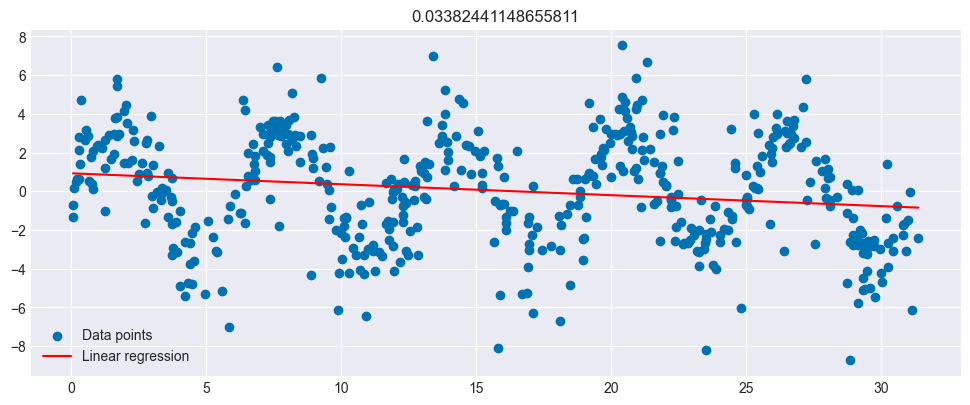

In [6]:
# Plot the scatter plot and the linear regression line
line_x = np.linspace(x.min(), x.max(), 100)
line_y = c[0] * line_x + c[1]

plt.scatter(x, y, label='Data points')
plt.plot(line_x, line_y, color='red', label='Linear regression')

plt.title(r2)
plt.legend()

### 2c)  Interpret the results of the linear regression of the dataset 

Interpret the results based on your plot and $R^2$ value. Is the linear regression model a good model for the data? Why?

Based on the R^2 value, the linear regression model is considered a bad model for the data because it is very close to 0. If the R^2 value was close or closer to 1, it would be considered a better fit / model for the data.